In [1]:
import pandas as pd
import numpy as np

In [58]:
train = pd.read_csv('/run/media/devesh/Files/Projects/Demand Forecasting/input/train.csv')
test = pd.read_csv('/run/media/devesh/Files/Projects/Demand Forecasting/input/test.csv')

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [60]:
train['Split'] = 'Train'
test['Split'] = 'Test'

In [61]:
df = pd.concat([train, test], axis = 0).reset_index(drop = True)

In [62]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20.0,Train
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28.0,Train
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19.0,Train
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44.0,Train
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52.0,Train


In [63]:
df['week'] = pd.to_datetime(df['week'])

In [16]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,Train
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,Train
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,Train
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,Train
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,Train


In [18]:
df['day'] = [date.day for date in df['week']]

In [64]:
df['month'] = [date.month for date in df['week']]

In [65]:
df['year'] = [date.year for date in df['week']]

In [21]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,day,month,year
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,Train,17,1,2011
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,Train,17,1,2011
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,Train,17,1,2011
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,Train,17,1,2011
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,Train,17,1,2011


In [66]:
df['discount_%'] = ((df['base_price'] - df['total_price'])/df['total_price'])*100
df['base_total_diff'] = df['base_price'] - df['total_price']

In [67]:
base_less_total = []

for i in range(len(df)):
    if df['base_price'][i] < df['total_price'][i]:
        base_less_total.append(1)
    else:
        base_less_total.append(0)

In [68]:
df['featured_display'] = df['is_display_sku'] ^ df['is_featured_sku']

In [69]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,month,year,discount_%,base_total_diff,featured_display
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,Train,1,2011,12.94964,12.825,0
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,Train,1,2011,0.00000,0.000,0
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,Train,1,2011,0.00000,0.000,0
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,Train,1,2011,0.00000,0.000,0
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,Train,1,2011,0.00000,0.000,0


In [70]:
df['base_less_total'] = base_less_total

In [71]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,month,year,discount_%,base_total_diff,featured_display,base_less_total
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,Train,1,2011,12.94964,12.825,0,0
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,Train,1,2011,0.00000,0.000,0,0
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,Train,1,2011,0.00000,0.000,0,0
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,Train,1,2011,0.00000,0.000,0,0
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,Train,1,2011,0.00000,0.000,0,0


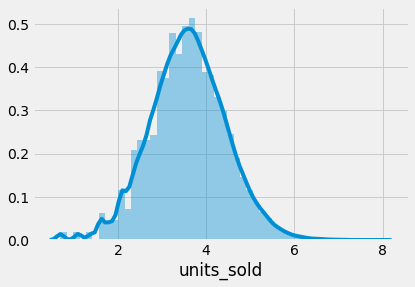

In [30]:
sns.distplot(np.log1p(train['units_sold']))

In [72]:
df['log_units_sold'] = np.log1p(df['units_sold'])

In [73]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,month,year,discount_%,base_total_diff,featured_display,base_less_total,log_units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,Train,1,2011,12.94964,12.825,0,0,3.044522
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,Train,1,2011,0.00000,0.000,0,0,3.367296
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,Train,1,2011,0.00000,0.000,0,0,2.995732
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,Train,1,2011,0.00000,0.000,0,0,3.806662
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,Train,1,2011,0.00000,0.000,0,0,3.970292


In [33]:
df.tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,day,month,year,discount_%,base_total_diff,featured_display,base_less_total,log_units_sold
164005,232281,2013-01-10,9984,223245,241.5375,241.5375,0,0,NaN,Test,10,1,2013,0.000000,0.0000,0,0,NaN
164006,232282,2013-01-10,9984,223153,240.8250,240.8250,0,0,NaN,Test,10,1,2013,0.000000,0.0000,0,0,NaN
164007,232285,2013-01-10,9984,245338,382.6125,401.8500,1,1,NaN,Test,10,1,2013,5.027933,19.2375,0,0,NaN
164008,232286,2013-01-10,9984,547934,191.6625,191.6625,0,0,NaN,Test,10,1,2013,0.000000,0.0000,0,0,NaN
164009,232287,2013-01-10,9984,679023,234.4125,234.4125,0,0,NaN,Test,10,1,2013,0.000000,0.0000,0,0,NaN


In [34]:
df.isnull().sum()

record_ID               0
week                    0
store_id                0
sku_id                  0
total_price             1
base_price              0
is_featured_sku         0
is_display_sku          0
units_sold          13860
Split                   0
day                     0
month                   0
year                    0
discount_%              1
base_total_diff         1
featured_display        0
base_less_total         0
log_units_sold      13860
dtype: int64

In [35]:
df.loc[df['total_price'].isnull()]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,day,month,year,discount_%,base_total_diff,featured_display,base_less_total,log_units_sold
136949,193915,2013-04-23,9436,245338,NaN,469.5375,0,0,1.0,Train,23,4,2013,NaN,NaN,0,0,0.693147


In [74]:
df['total_price'] = df['total_price'].fillna(469.5375)
df['discount_%'] = df['discount_%'].fillna(0.0)
df['base_total_diff'] = df['base_total_diff'].fillna(0.0)

In [75]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,month,year,discount_%,base_total_diff,featured_display,base_less_total,log_units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,Train,1,2011,12.94964,12.825,0,0,3.044522
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,Train,1,2011,0.00000,0.000,0,0,3.367296
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,Train,1,2011,0.00000,0.000,0,0,2.995732
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,Train,1,2011,0.00000,0.000,0,0,3.806662
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,Train,1,2011,0.00000,0.000,0,0,3.970292


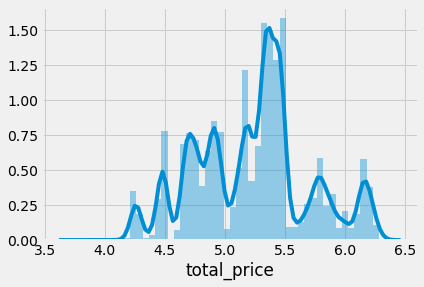

In [41]:
sns.distplot(np.log1p(df['total_price']))

In [76]:
train['log_units_sold'] = np.log1p(train['units_sold'])

In [77]:
train['bins'] = pd.cut(train['log_units_sold'], bins=8, labels=False)

In [78]:
train.groupby('store_id')['bins'].mean()

store_id
8023    3.460073
8058    2.765128
8063    2.340486
8091    2.320513
8094    2.528526
          ...   
9890    2.914201
9909    3.038462
9954    2.357466
9961    3.034389
9984    2.456561
Name: bins, Length: 76, dtype: float64

In [79]:
encode = ['store_id', 'sku_id', 'is_featured_sku', 'is_display_sku']

In [80]:
for label in encode:
    x = train.groupby(label)['bins'].mean()
    
    df[label] = df[label].map(x)

In [81]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Split,month,year,discount_%,base_total_diff,featured_display,base_less_total,log_units_sold
0,1,2011-01-17,2.320513,3.369683,99.0375,111.8625,2.603804,2.564656,20.0,Train,1,2011,12.94964,12.825,0,0,3.044522
1,2,2011-01-17,2.320513,3.199426,99.0375,99.0375,2.603804,2.564656,28.0,Train,1,2011,0.00000,0.000,0,0,3.367296
2,3,2011-01-17,2.320513,2.376923,133.9500,133.9500,2.603804,2.564656,19.0,Train,1,2011,0.00000,0.000,0,0,2.995732
3,4,2011-01-17,2.320513,2.831185,133.9500,133.9500,2.603804,2.564656,44.0,Train,1,2011,0.00000,0.000,0,0,3.806662
4,5,2011-01-17,2.320513,2.974396,141.0750,141.0750,2.603804,2.564656,52.0,Train,1,2011,0.00000,0.000,0,0,3.970292


In [89]:
selector = [
    'store_id',
    'sku_id',
    'total_price',
    'base_price',
    'is_featured_sku',
    'is_display_sku',
#     'month',
#     'year',
    'base_total_diff',
    'featured_display',
    'base_less_total'
]

In [90]:
train = df[df['Split'] == 'Train']
test = df[df['Split'] == 'Test']

In [86]:
from sklearn.metrics import make_scorer, mean_squared_error

def custom_metric(y_true, preds):
    rmse = np.sqrt(mean_squared_error(y_true, preds))
    rmse = rmse*100
    return rmse

rmsle = make_scorer(custom_metric, greater_is_better=False)

In [91]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

rgr = LGBMRegressor()

scores = cross_val_score(rgr, train[selector], train['log_units_sold'], cv=5, scoring=rmsle)

In [92]:
scores

array([-46.08411699, -46.25159004, -47.2558908 , -45.35652948,
       -46.57466585])